In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("./housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
data.isnull().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
mean = data["total_bedrooms"].mean()

In [8]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [9]:
data.isnull().sum(axis = 0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


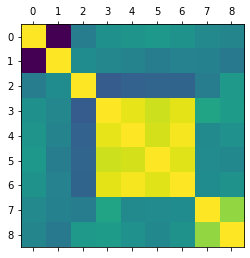

In [11]:
plt.matshow(data.corr())
plt.show()

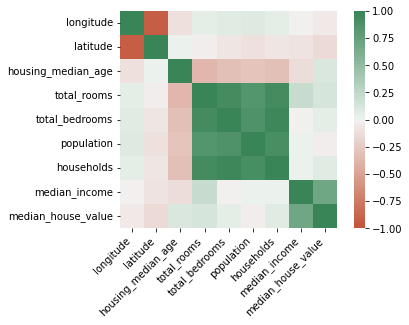

In [12]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 140, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
data = data.drop(["longitude"] , axis = 1)

In [14]:
data.head(19999)

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...
19994,36.19,24,1306,266.0,889,276,2.4922,66100,INLAND
19995,36.19,6,958,226.0,734,230,1.0349,67800,INLAND
19996,36.16,27,2119,373.0,1268,345,2.8152,106900,INLAND
19997,36.16,21,2751,602.0,1496,489,2.3882,49200,INLAND


In [15]:
X = data.loc[data['ocean_proximity'] == "NEAR BAY"]
X["median_house_value"].mean()

259212.31179039303

In [16]:
X = data.loc[data['ocean_proximity'] == "INLAND"]
X["median_house_value"].mean()

124805.39200122119

In [17]:
X = data.loc[data['ocean_proximity'] == "<1H OCEAN"]
X["median_house_value"].mean()

240084.28546409807

In [18]:
X = data.loc[data['ocean_proximity'] == "NEAR OCEAN"]
X["median_house_value"].mean()

249433.97742663656

In [19]:
data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == 'NEAR BAY'] = 2
data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == 'INLAND'] = 1
data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == 'NEAR OCEAN'] = 2
data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == '<1H OCEAN'] = 2
data 

C:\Users\Vinay\AppData\Local\Temp/ipykernel_16956/2715092698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == 'NEAR BAY'] = 2
C:\Users\Vinay\AppData\Local\Temp/ipykernel_16956/2715092698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ocean_proximity=data.ocean_proximity[data.ocean_proximity == 'INLAND'] = 1
C:\Users\Vinay\AppData\Local\Temp/ipykernel_16956/2715092698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,41,880,129.0,322,126,8.3252,452600,2
1,37.86,21,7099,1106.0,2401,1138,8.3014,358500,2
2,37.85,52,1467,190.0,496,177,7.2574,352100,2
3,37.85,52,1274,235.0,558,219,5.6431,341300,2
4,37.85,52,1627,280.0,565,259,3.8462,342200,2
...,...,...,...,...,...,...,...,...,...
20635,39.48,25,1665,374.0,845,330,1.5603,78100,2
20636,39.49,18,697,150.0,356,114,2.5568,77100,2
20637,39.43,17,2254,485.0,1007,433,1.7000,92300,2
20638,39.43,18,1860,409.0,741,349,1.8672,84700,2


In [20]:
cols = data.columns.tolist()
cols

['latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [21]:
cols[-1] = 'median_house_value'
cols[-2] = 'ocean_proximity'
cols

['latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [22]:
data = data[cols]
data

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,37.88,41,880,129.0,322,126,8.3252,2,452600
1,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500
2,37.85,52,1467,190.0,496,177,7.2574,2,352100
3,37.85,52,1274,235.0,558,219,5.6431,2,341300
4,37.85,52,1627,280.0,565,259,3.8462,2,342200
...,...,...,...,...,...,...,...,...,...
20635,39.48,25,1665,374.0,845,330,1.5603,2,78100
20636,39.49,18,697,150.0,356,114,2.5568,2,77100
20637,39.43,17,2254,485.0,1007,433,1.7000,2,92300
20638,39.43,18,1860,409.0,741,349,1.8672,2,84700


In [23]:
data.mean()

latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
ocean_proximity            2.000000
median_house_value    206855.816909
dtype: float64

In [24]:
data.std()

latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           419.266592
population              1132.462122
households               382.329753
median_income              1.899822
ocean_proximity            0.000000
median_house_value    115395.615874
dtype: float64

In [25]:
cut_off = 3*data.std()

In [26]:
cut_off

latitude                   6.407857
housing_median_age        37.756673
total_rooms             6544.845755
total_bedrooms          1257.799777
population              3397.386365
households              1146.989258
median_income              5.699465
ocean_proximity            0.000000
median_house_value    346186.847623
dtype: float64

In [27]:
lower,upper = data.mean()- cut_off,data.mean()+cut_off
upper

latitude                  42.039719
housing_median_age        66.396159
total_rooms             9180.608836
total_bedrooms          1795.670330
population              4822.863109
households              1646.528939
median_income              9.570136
ocean_proximity            2.000000
median_house_value    553042.664532
dtype: float64

In [28]:
((data < (lower)) | (data > (upper))).sum()

latitude                0
housing_median_age      0
total_rooms           373
total_bedrooms        375
population            342
households            363
median_income         345
ocean_proximity         0
median_house_value      0
dtype: int64

In [29]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [30]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1306
population            1196
households            1220
median_income          681
ocean_proximity          0
median_house_value    1071
dtype: int64

In [31]:
mask = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [32]:
data[mask] = np.nan
data

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,37.88,41,880.0,129.0,322.0,126.0,NaN,2,452600.0
1,37.86,21,NaN,1106.0,2401.0,NaN,NaN,2,358500.0
2,37.85,52,1467.0,190.0,496.0,177.0,7.2574,2,352100.0
3,37.85,52,1274.0,235.0,558.0,219.0,5.6431,2,341300.0
4,37.85,52,1627.0,280.0,565.0,259.0,3.8462,2,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,25,1665.0,374.0,845.0,330.0,1.5603,2,78100.0
20636,39.49,18,697.0,150.0,356.0,114.0,2.5568,2,77100.0
20637,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,2,92300.0
20638,39.43,18,1860.0,409.0,741.0,349.0,1.8672,2,84700.0


In [33]:
data = data.dropna()

In [34]:
data

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2,37.85,52,1467.0,190.0,496.0,177.0,7.2574,2,352100.0
3,37.85,52,1274.0,235.0,558.0,219.0,5.6431,2,341300.0
4,37.85,52,1627.0,280.0,565.0,259.0,3.8462,2,342200.0
5,37.85,52,919.0,213.0,413.0,193.0,4.0368,2,269700.0
6,37.84,52,2535.0,489.0,1094.0,514.0,3.6591,2,299200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,25,1665.0,374.0,845.0,330.0,1.5603,2,78100.0
20636,39.49,18,697.0,150.0,356.0,114.0,2.5568,2,77100.0
20637,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,2,92300.0
20638,39.43,18,1860.0,409.0,741.0,349.0,1.8672,2,84700.0


In [35]:
17609/5

3521.8

In [ ]:
17609 - 3522

In [ ]:
3522

In [ ]:
data_1 = data.head(14087)
data_2 = data.tail(len(data) - 14087)
data_2["median_house_value"]


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split